# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2021 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani

## Lab 2 - Classification
### Presenter: Samira Asadi - saa143@sfu.ca


In [1]:
# Load General Libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Importing the dataset (no header)
df0 = pd.read_csv("EMG\EMG_0.csv", header=None)
df1 = pd.read_csv("EMG\EMG_1.csv", header=None)
df2 = pd.read_csv("EMG\EMG_2.csv", header=None)
df3 = pd.read_csv("EMG\EMG_3.csv", header=None)
dataset = pd.concat([df0,df1,df2,df3], axis = 0)

# Importing hand gestures images
import matplotlib.image as mpimg
img0 = mpimg.imread('EMG/0.jpg')
img1 = mpimg.imread('EMG/1.jpg')
img2 = mpimg.imread('EMG/2.jpg')
img3 = mpimg.imread('EMG/3.jpg')

# Binary Classification

In [2]:
# Creating a Binary Dataset (by only considering 2 labels)
# Class 0: Closed Fist
# Class 1: Open Hand

dataset_binary = dataset[dataset.iloc[:, -1].isin([0,2])]
dataset_binary.iloc[:, -1].replace(to_replace=2, value=1, inplace=True)

# Split features and targets - X: Features, y: Targets
X_binary = dataset_binary.iloc[:, :-1]
y_binary = dataset_binary.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2)

# Save Test Set
np.savetxt("features_emg_test_binary.csv", X_test_binary, delimiter=",")
np.savetxt("targets_emg_test_binary.csv", y_test_binary, delimiter=",")

# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
X_train_binary = pd.DataFrame(StandardScaler().fit_transform(X_train_binary))
X_test_binary = pd.DataFrame(StandardScaler().fit_transform(X_test_binary))

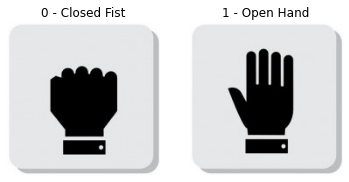

In [3]:
# Display what each label refers to - Binary Classification
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img0)
plt.axis('off')
plt.title('0 - Closed Fist')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.title('1 - Open Hand')
plt.show()

## Test the difference between the mean values of two features from different classes

In [4]:
from scipy.stats import ttest_ind

FEATURES_C1 = dataset_binary[dataset_binary.iloc[:, -1]==0] # features for closed fist
FEATURES_C2 = dataset_binary[dataset_binary.iloc[:, -1]==1] # features for open hand

# Test the significance
T_STATISTIC, P_VALUE = ttest_ind(FEATURES_C1.iloc[:, 0],FEATURES_C2.iloc[:, 0])

print("p-value =", P_VALUE)
# if the p-value is less than 0.05 we have significant different between feature values
if P_VALUE < 0.05:
    print("significant")
else:
    print("not significant")

p-value = 0.4755523968271138
not significant


## Logistic Regression

In [5]:
# Import the class
from sklearn.linear_model import LogisticRegression

# Instantiating the model (using the default parameters)
logreg = LogisticRegression()

# Fitting the model with data
logreg.fit(X_train_binary,y_train_binary)

# Save the Trained Model
pickle.dump(logreg, open('Model_LogisticRegression.pkl', 'wb'))

# Predicting the labels on test set
y_pred_binary = logreg.predict(X_test_binary)

## Model Evaluation using Confusion Matrix

Confusion Matrix
 [[280 323]
 [183 385]]
Accuracy: 0.5678906917164817
Precision: 0.5437853107344632
Recall: 0.6778169014084507
F1 Score: 0.603448275862069


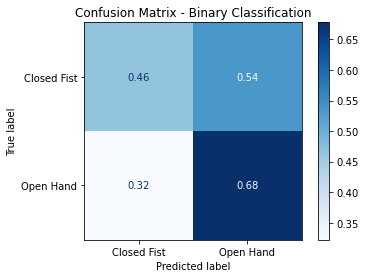

In [6]:
# import the metrics class
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cnf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
print('Confusion Matrix\n', cnf_matrix)

plt_cnf_matrix = plot_confusion_matrix(logreg, X_test_binary, y_test_binary,
                                       display_labels=['Closed Fist','Open Hand'],
                                       cmap=plt.cm.Blues,
                                       normalize='true')
plt_cnf_matrix.ax_.set_title('Confusion Matrix - Binary Classification')

# Print Evaluation Metrics
print("Accuracy:",accuracy_score(y_test_binary, y_pred_binary))
print("Precision:",precision_score(y_test_binary, y_pred_binary))
print("Recall:",recall_score(y_test_binary, y_pred_binary))
print("F1 Score:",f1_score(y_test_binary, y_pred_binary))

# Multi-Class Classification

In [7]:
# Multi-class dataset
# Class 0: Closed Fist
# Class 1: V Sign
# Class 2: Open Hand
# Class 3: OK Gesture
# Split features and targets - X: Features, y: Targets
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Save Test Set
np.savetxt("features_emg_test.csv", X_test, delimiter=",")
np.savetxt("targets_emg_test.csv", y_test, delimiter=",")

# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test))

In [8]:
print(X_train.shape)

(9342, 64)


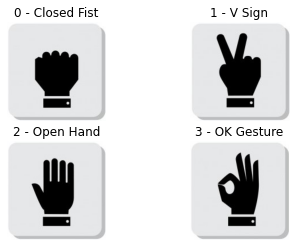

In [9]:
# Display what each label refers to - Multi-class Classification
fig = plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img0)
plt.axis('off')
plt.title('0 - Closed Fist')
plt.subplot(2, 2, 2)
plt.imshow(img1)
plt.axis('off')
plt.title('1 - V Sign')
plt.subplot(2, 2, 3)
plt.imshow(img2)
plt.axis('off')
plt.title('2 - Open Hand')
plt.subplot(2, 2, 4)
plt.imshow(img3)
plt.axis('off')
plt.title('3 - OK Gesture')
plt.show()

# Classification Models

In [10]:
# Some Functions for Showing the Classifier Performance
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

labels = ['Closed Fist','V Sign','Open Hand','OK Gesture']
def classifier_performance(model,y_pred):
    print('Classification Report: \n', classification_report(y_test,y_pred,target_names=labels))
    # Plot normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=labels,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    plt.show()
    return

### K Nearest Neighbors Classification

Classification Report: 
               precision    recall  f1-score   support

 Closed Fist       0.94      0.66      0.77       586
      V Sign       0.54      0.94      0.69       580
   Open Hand       0.82      0.30      0.44       589
  OK Gesture       0.61      0.75      0.67       581

    accuracy                           0.66      2336
   macro avg       0.73      0.66      0.64      2336
weighted avg       0.73      0.66      0.64      2336

Confusion matrix, without normalization
[[384 117  37  48]
 [  1 548   0  31]
 [  4 216 175 194]
 [ 20 125   2 434]]
Normalized confusion matrix
[[0.6552901  0.1996587  0.06313993 0.08191126]
 [0.00172414 0.94482759 0.         0.05344828]
 [0.00679117 0.36672326 0.29711375 0.32937182]
 [0.03442341 0.2151463  0.00344234 0.74698795]]


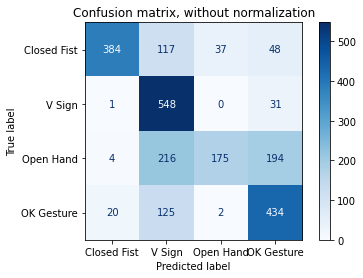

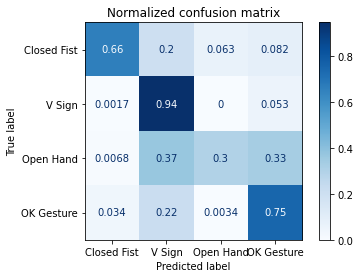

In [11]:
# Import the class
from sklearn.neighbors import KNeighborsClassifier

# Instantiating the model (using the default parameters)
MODEL_KNN = KNeighborsClassifier(n_neighbors=5)

# Train the Model
MODEL_KNN.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_KNN, open('Model_KNeighborsClassifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_KNN = MODEL_KNN.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_KNN,y_pred_KNN)

### Decision Trees Classification

Classification Report: 
               precision    recall  f1-score   support

 Closed Fist       0.87      0.85      0.86       586
      V Sign       0.76      0.80      0.78       580
   Open Hand       0.77      0.71      0.74       589
  OK Gesture       0.66      0.69      0.67       581

    accuracy                           0.76      2336
   macro avg       0.77      0.76      0.76      2336
weighted avg       0.77      0.76      0.76      2336

Confusion matrix, without normalization
[[499   7  28  52]
 [  2 463  42  73]
 [ 23  60 421  85]
 [ 50  78  53 400]]
Normalized confusion matrix
[[0.85153584 0.01194539 0.04778157 0.0887372 ]
 [0.00344828 0.79827586 0.07241379 0.12586207]
 [0.03904924 0.10186757 0.7147708  0.14431239]
 [0.08605852 0.13425129 0.09122203 0.68846816]]


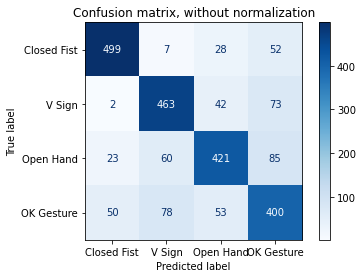

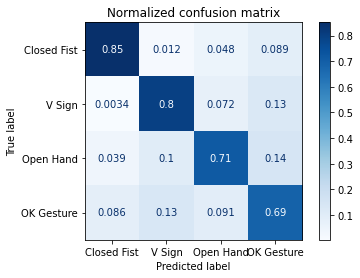

In [12]:
# Import the class
from sklearn.tree import DecisionTreeClassifier

# Instantiating the model (using the default parameters)
MODEL_DT = DecisionTreeClassifier()

# Train the Model
MODEL_DT.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_DT, open('DecisionTreeClassifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_DT = MODEL_DT.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_DT,y_pred_DT)

### Gaussian Naive Bayes Classification

Classification Report: 
               precision    recall  f1-score   support

 Closed Fist       0.91      0.91      0.91       586
      V Sign       0.86      0.94      0.90       580
   Open Hand       0.95      0.91      0.93       589
  OK Gesture       0.83      0.78      0.80       581

    accuracy                           0.88      2336
   macro avg       0.88      0.88      0.88      2336
weighted avg       0.88      0.88      0.88      2336

Confusion matrix, without normalization
[[531   1   6  48]
 [  1 545  13  21]
 [  6  21 535  27]
 [ 47  69  12 453]]
Normalized confusion matrix
[[0.90614334 0.00170648 0.01023891 0.08191126]
 [0.00172414 0.93965517 0.02241379 0.0362069 ]
 [0.01018676 0.03565365 0.90831919 0.04584041]
 [0.08089501 0.11876076 0.02065404 0.77969019]]


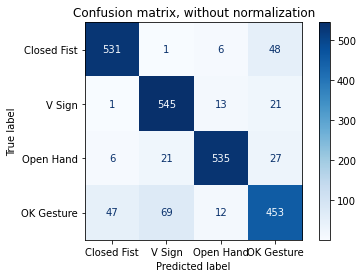

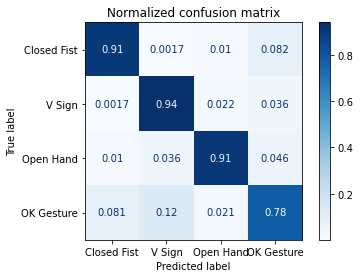

In [13]:
# Import the class
from sklearn.naive_bayes import GaussianNB

# Instantiating the model (using the default parameters)
MODEL_GNB = GaussianNB()

# Train the Model
MODEL_GNB.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_GNB, open('Model_GaussianNB.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_GNB = MODEL_GNB.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_GNB,y_pred_GNB)

### Support Vector Machines

Classification Report: 
               precision    recall  f1-score   support

 Closed Fist       0.94      0.88      0.91       586
      V Sign       0.87      0.98      0.92       580
   Open Hand       0.91      0.86      0.88       589
  OK Gesture       0.86      0.85      0.85       581

    accuracy                           0.89      2336
   macro avg       0.89      0.89      0.89      2336
weighted avg       0.89      0.89      0.89      2336

Confusion matrix, without normalization
[[518  10  37  21]
 [  3 570   5   2]
 [  6  19 505  59]
 [ 27  54   9 491]]
Normalized confusion matrix
[[0.88395904 0.01706485 0.06313993 0.03583618]
 [0.00517241 0.98275862 0.00862069 0.00344828]
 [0.01018676 0.03225806 0.8573854  0.10016978]
 [0.0464716  0.0929432  0.01549053 0.84509466]]


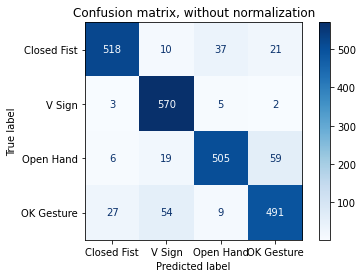

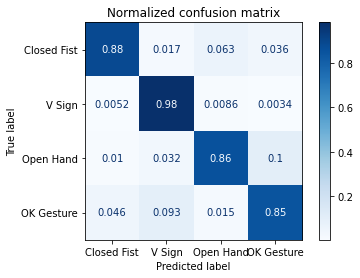

In [14]:
# Import the class
from sklearn.svm import SVC

# Instantiating the model (using the default parameters)
MODEL_SVM = SVC()

# Train the Model
MODEL_SVM.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_SVM, open('Model_SupportVectorClasifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_SVM = MODEL_SVM.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_SVM,y_pred_SVM)